# Ax Hyperparameter Optimization Tutorial

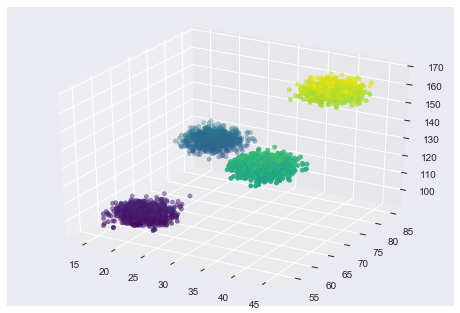

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from mpl_toolkits import mplot3d
import tensorflow as tf
from data.synthetic import plot_data, get_normal_data

X, y = get_normal_data(1000, xy_features=(2,1))
plot_data(X, y)

n = len(X)
batch_size = 32
dataset = tf.data.Dataset \
    .from_tensor_slices((X,y)) \
    .shuffle(n).batch(batch_size)

In [8]:
from model.gmm import GMM

In [16]:
def opt_gmm(p):
    gmm = GMM(x_features=X.shape[1],
              y_features=y.shape[1],
              n_components=p["n_components"],
              n_hidden=p["n_hidden"])
    gmm.fit(dataset, epochs=500)
    pi, mu, sigma = gmm.model(X)
    return gmm.loss(y, pi, mu, sigma).numpy()

In [18]:
from ax import optimize

best_parameters, best_values, experiment, model = optimize(
    parameters=[
      {
        "name": "n_components",
        "type": "range",
        "bounds": [1, 10],
      },
      {
        "name": "n_hidden",
        "type": "range",
        "bounds": [1, 50],
      },
    ],
    # Booth function
    evaluation_function=opt_gmm,
    objective_name='nll',
    minimize=True,
)

[INFO 06-15 13:26:21] ax.modelbridge.dispatch_utils: Using Bayesian Optimization generation strategy: GenerationStrategy(name='Sobol+GPEI', steps=[Sobol for 5 trials, GPEI for subsequent trials]). Iterations after 5 will take longer to generate due to  model-fitting.
[INFO 06-15 13:26:21] ax.service.managed_loop: Started full optimization with 20 steps.
[INFO 06-15 13:26:21] ax.service.managed_loop: Running optimization trial 1...
[INFO 06-15 13:30:50] ax.service.managed_loop: Running optimization trial 2...
[INFO 06-15 13:35:37] ax.service.managed_loop: Running optimization trial 3...
[INFO 06-15 13:40:04] ax.service.managed_loop: Running optimization trial 4...
[INFO 06-15 13:44:33] ax.service.managed_loop: Running optimization trial 5...
[INFO 06-15 13:48:37] ax.service.managed_loop: Running optimization trial 6...
[INFO 06-15 13:53:36] ax.service.managed_loop: Running optimization trial 7...
[INFO 06-15 13:58:08] ax.service.managed_loop: Running optimization trial 8...
[INFO 06-15 

In [19]:
best_parameters, best_values, experiment, model

({'n_components': 10, 'n_hidden': 46},
 ({'objective': 2.243208698513201},
  {'objective': {'objective': 2.446275215489849e-08}}),
 SimpleExperiment(None),
 <ax.modelbridge.torch.TorchModelBridge at 0x1bf106b0588>)

In [31]:
render(plot_contour(model=model, param_x='n_components', param_y='n_hidden', metric_name='objective'))